<a href="https://colab.research.google.com/github/luis8choa/Computer_Vision/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout

In [ ]:
def normalized(x, xmax, xmin):
  ymax = 1
  ymin = -1

  m = (ymax-ymin) / (xmax-xmin)
  b= ymin - m*xmin

  y = m*x+b

  return y

In [ ]:
data = pd.read_excel('winequality-red.xlsx')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data2 = data

In [ ]:
data2['quality'][data2['quality'] == 3] = 0
data2['quality'][data2['quality'] == 4] = 1
data2['quality'][data2['quality'] == 5] = 2
data2['quality'][data2['quality'] == 6] = 3
data2['quality'][data2['quality'] == 7] = 4
data2['quality'][data2['quality'] == 8] = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:

data2['fixed acidity'] = normalized(data2['fixed acidity'],np.max(data2['fixed acidity']),np.min(data2['fixed acidity']))
data2['volatile acidity'] = normalized(data2['volatile acidity'],np.max(data2['volatile acidity']),np.min(data2['volatile acidity']))
data2['citric acid'] = normalized(data2['citric acid'],np.max(data2['citric acid']),np.min(data2['citric acid']))
data2['residual sugar'] = normalized(data2['residual sugar'],np.max(data2['residual sugar']),np.min(data2['residual sugar']))
data2['chlorides'] = normalized(data2['chlorides'],np.max(data2['chlorides']),np.min(data2['chlorides']))
data2['free sulfur dioxide'] = normalized(data2['free sulfur dioxide'],np.max(data2['free sulfur dioxide']),np.min(data2['free sulfur dioxide']))
data2['total sulfur dioxide'] = normalized(data2['total sulfur dioxide'],np.max(data2['total sulfur dioxide']),np.min(data2['total sulfur dioxide']))
data2['density'] = normalized(data2['density'],np.max(data2['density']),np.min(data2['density']))
data2['pH'] = normalized(data2['pH'],np.max(data2['pH']),np.min(data2['pH']))
data2['sulphates'] = normalized(data2['sulphates'],np.max(data2['sulphates']),np.min(data2['sulphates']))
data2['alcohol'] = normalized(data2['alcohol'],np.max(data2['alcohol']),np.min(data2['alcohol']))

In [ ]:
train_data = data2.drop(["quality"], axis=1).values;
target_data = data2["quality"].values;


In [ ]:
print(train_data.shape)
print(target_data.shape)

(1599, 11)
(1599,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.30, random_state=12, shuffle = True)

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1119, 11)
(1119,)
(480, 11)
(480,)


In [ ]:
y_train2 = np_utils.to_categorical(y_train)
y_test2 = np_utils.to_categorical(y_test)
print(y_test2)
print(y_train2)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

NameError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7c0a0e450>,
      dtype=object)

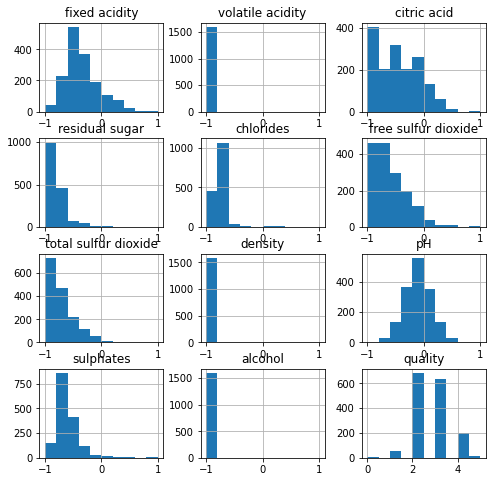

In [ ]:
data2.hist(figsize=(8,8))

In [ ]:
def Sequential_model():
  model = Sequential()
  model.add(Dense(33, input_dim = 11, activation='tanh'))
  model.add(Dropout(0.2))
  model.add(Dense(12, activation='tanh'))
  model.add(Dropout(0.2))
  model.add(Dense(6, activation='softmax'))

  model.summary()
  model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

  return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 33)                396       
_________________________________________________________________
dropout (Dropout)            (None, 33)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
Total params: 882
Trainable params: 882
Non-trainable params: 0
_________________________________________________________________


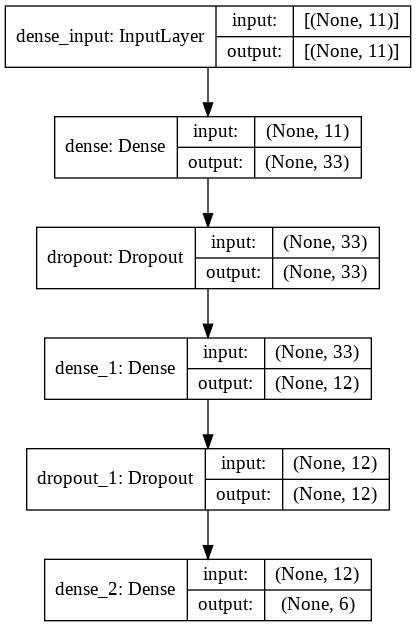

In [ ]:
model = Sequential_model();
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x_train, y_train2, validation_data=(x_test, y_test2), epochs=1000, batch_size=32, shuffle=True, verbose=0)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()